<font size="6">MEC301 - Métodos Numéricos</font>
# Repaso Parte 3 -  Métodos numéricos para ecuaciones diferenciales
Profesor: Francisco Ramírez Cuevas<br>

## Derivación numérica

### Tarea 4, problema 2

La entalpía de un gas real es una función de la presión en la forma:

\begin{equation*}
H(P_0,T_0) = \int_0^{P_0}\left[V - T_0\left(\frac{\partial V}{\partial T}\right)_{P,T_0}\right]dP
\end{equation*}

donde $V$ es el volumen del gas en litros ($\mathrm{L}$), $T$ y $T_0$ son temperarturas en Kelvin ($\mathrm{K}$), $P$ y $P_0$ son presiones en atmósferas ($\mathrm{atm}$), y $\left(\frac{\partial V}{\partial T}\right)_{P,T_0}$ es la derivada de $V$ respecto a $T$ evaluada en una presión $P$ y temperatura $T_0$.

Considerando la siguiente tabla de $V$ en función de $T$ y $P$:

<img src="./images/Enthalpy_table.png" width="350px" align= center>

**Determine $H$ en $\mathrm{L}\cdot\mathrm{atm}$ para $T_0 = 400$ K y $P_0 = 50$ atm**. 
> *Considere el límite inferior de la integral como 0.1 atm.*

In [1]:
# importamos datos a un arreglo numpy
import numpy as np

V = np.array([[220.0, 4.10, 2.2, 1.35, 1.10, 0.90, 0.68, 0.61 , 0.54], 
              [250.0, 4.70, 2.5, 1.49, 1.20, 0.99, 0.75, 0.675, 0.60],
              [282.5, 5.23, 2.7, 1.55, 1.24, 1.03, 0.78, 0.700, 0.62]])
V = V.T

P = np.array([0.1, 5, 10, 20, 25, 30, 40, 45, 50])
T = np.array([350, 400, 450])

In [2]:
print('V =\n', V)

V =
 [[220.    250.    282.5  ]
 [  4.1     4.7     5.23 ]
 [  2.2     2.5     2.7  ]
 [  1.35    1.49    1.55 ]
 [  1.1     1.2     1.24 ]
 [  0.9     0.99    1.03 ]
 [  0.68    0.75    0.78 ]
 [  0.61    0.675   0.7  ]
 [  0.54    0.6     0.62 ]]


In [3]:
# opción 1. Usando diferencia central

# derivada dVdT para T =  400 K (0.5 pts)
dVdT = (V[:,2] - V[:,0])/(T[2] - T[0])

# integral del arreglo generado (0.5 pts)
H = np.trapz(V[:,1] - T[1]*dVdT,P) 
print('La entalpía del gas es: H = %.5f L*atm' % H)

La entalpía del gas es: H = 21.44100 L*atm


In [4]:
# opción 2. Usando gradient
# Derivada dVdT para T =  400 K (0.5 pts)
tt, pp = np.meshgrid(T, P)
dVdT_grad = np.gradient(V,T, axis = 1)

In [5]:
# Integral del arreglo generado (0.5 pts)
H = np.trapz(V[:,1] - T[1]*dVdT_grad[:,1],P)
print('La entalpía del gas es: H = %.5f L*atm' % H)

La entalpía del gas es: H = 21.44100 L*atm


## Ecuaciones Diferenciales Ordinarias con Condiciones Inicial

### Tarea 4, problema 3

En ingeniería es común utilizar sistemas masa-resorte para analizar vibraciones en estructuras bajo la influencia de fuerzas externas, como terremotos.

En la siguiente figura, se muestra un sistema masa-resorte para un edificio de 3 pisos. El análisis está limitado al moviento horizontal de cada componente.


<img src="./images/spring_mass_problem.png" width="250px" align= center>

En base a la ley de Newton, el modelo matemático de este problema está dado por:

\begin{align*}
\frac{d^2}{dt^2}x_1 &= - \frac{k_1}{m_1}x_1 + \frac{k_2}{m_1}(x_2 - x_1) \\
\frac{d^2}{dt^2}x_2 &= \frac{k_2}{m_2}(x_1 - x_2) + \frac{k_3}{m_2}(x_3 - x_2) \\
\frac{d^2}{dt^2}x_3 &= \frac{k_3}{m_3}(x_2 - x_3)
\end{align*}

con condiciones inciales $\dot{x}_1(0) = 1$ m/s, $\dot{x}_2(0) = \dot{x}_3(0) = 0$ m/s, y $x_1(0) = x_2(0) = x_3(0) = 0$ m.



La respuesta del sistema en el periodo de $t=0$ a $t = 20$ s es:


<img src="./images/x1x2x3_solution.png" width="700px" align= center>|

**(a)** Utilizando `solve_ivp`, resuelva el sistema y grafique la evolución de $x_1$, $x_2$ y $x_3$ en el periodo de $t=0$ a $t = 20$ s.

Por definición, $\frac{dx_1}{dt} = \dot{x}_1$, $\frac{dx_2}{dt} = \dot{x}_2$, y $\frac{dx_3}{dt} = \dot{x}_3$. A partir de esto, el sistema $\frac{d\vec{y} }{dt}= \vec{F}(t, \vec{y})$ está dado por:

\begin{align*}
\frac{d\dot{x}_1}{dt^2} &= - \frac{k_1}{m_1}x_1 + \frac{k_2}{m_1}(x_2 - x_1) \\
\frac{dx_1}{dt} &= x_1 \\
\frac{d\dot{x}_2}{dt^2} &= \frac{k_2}{m_2}(x_1 - x_2) + \frac{k_3}{m_2}(x_3 - x_2) \\
\frac{dx_1}{dt} &= x_2 \\
\frac{d\dot{x}_3}{dt^2} &= \frac{k_3}{m_3}(x_2 - x_3) \\
\frac{dx_1}{dt} &= x_3 \\
\end{align*}

El sistema es equivalente a un problema de la forma $\frac{d\vec{y} }{dt} = \vec{F}(t,\vec{y})$:

\begin{equation*}
\frac{d}{dt}\left[
\begin{matrix}
\dot{x}_1 \\
x_1 \\
\dot{x}_2 \\
x_2 \\
\dot{x}_3 \\
x_3 
\end{matrix}
\right] = 
\left[
\begin{matrix}
- \frac{k_1}{m_1}x_1 + \frac{k_2}{m_1}(x_2 - x_1) \\
 \dot{x}_1 \\
\frac{k_2}{m_2}(x_1 - x_2) + \frac{k_3}{m_2}(x_3 - x_2) \\
\dot{x}_2 \\
\frac{k_3}{m_3}(x_2 - x_3) \\
\dot{x}_3 \\
\end{matrix} \right]
\end{equation*}

In [6]:
import numpy as np

# Función F de ecuación diferencial (0.3 pts)
def F(t,y):
    k1, k2, k3 = 3000E3,  2400E3,  1800E3 # constante de los resortes (N/m)
    m1, m2, m3 =  12000,   10000,   8000  # masa de cada piso (kg)
    
    f = np.zeros(6)
    f[0] = -k1/m1*y[1] + k2/m1*(y[3] - y[1])
    f[1] = y[0]
    f[2] = +k2/m2*(y[1] - y[3]) + k3/m2*(y[5] - y[3])
    f[3] = y[2]
    f[4] = +k3/m3*(y[3] - y[5])
    f[5] = y[4]
    return f

# condiciones iniciales (0.1 pts)
y0 = np.array([1,0,0,0,0,0])

In [7]:
# Usamos solve_ivp para resolver el sistema (0.4 pts)
from scipy.integrate import solve_ivp

# Definimos rango de tiempo
tstart, tend = 0, 20               # tiempo incial y final
sol = solve_ivp(F,t_span = (tstart,tend), y0 = y0)

# retornamos nuestro resultado a las variables respectivas    
x1_dot, x1 = sol.y[0,:], sol.y[1,:]
x2_dot, x2 = sol.y[2,:], sol.y[3,:]
x3_dot, x3 = sol.y[4,:], sol.y[5,:] 

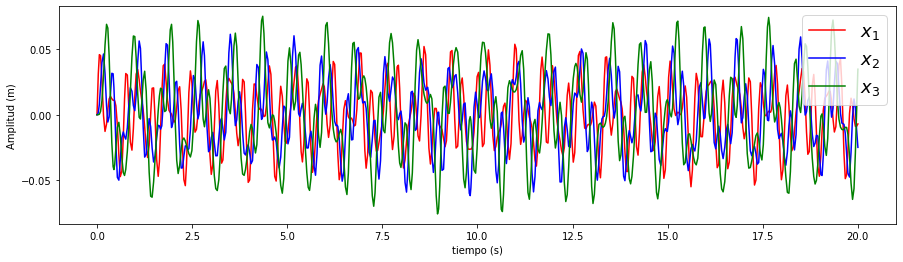

In [8]:
import matplotlib.pyplot as plt

# Graficar resultado (0.2 pts)
 
# formato del lienzo
fig, ax = plt.subplots(figsize=(15,4)) # Tamaño del lienzo
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente

# graficamos la evolución de x1, x2 y x3
plt.plot(sol.t,x1,'r',label = '$x_1$')
plt.plot(sol.t,x2,'b',label = '$x_2$')
plt.plot(sol.t,x3,'g',label = '$x_3$')

# formateamos los ejes
plt.ylabel('Amplitud (m)')
plt.xlabel('tiempo (s)')
plt.legend()
plt.show()

Resolvamos este problema usando, por ejemplo, el [método del punto medio](https://panxopanza.github.io/metodos_numericos_mec301/9-EDO_valor_inicial/9-EDO_valor_inicial.html#runge-kutta-de-segundo-orden-rk2)

\begin{equation*}
y_{i+1} = y_i + k_2h
\end{equation*}

\begin{align*}
k_1 &= F(t_i,y_i) \\
k_2 &= F(t_i+h/2,y_i+k_1h/2)
\end{align*}

<img src="./images/Midpoint_method.png" width="700px" align= center>

In [9]:
h = 0.0001                      # paso de tiempo
t = np.arange(tstart,tend,h)    # intervalo de tiempo
y = np.zeros((len(y0), len(t))) # arreglo para almacenar la variable y
y[:,0] = y0                     # guardamos condición incial

for i in range(len(t)-1):
    k1 = F(t[i], y[:,i])
    k2 = F(t[i]+h/2, y[:,i] + k1*h/2)
    y[:,i+1] = y[:,i] + h*k2

# retornamos nuestro resultado a las variables respectivas (0.1 pts)
x1_dot, x1 = y[0,:], y[1,:]
x2_dot, x2 = y[2,:], y[3,:]
x3_dot, x3 = y[4,:], y[5,:]

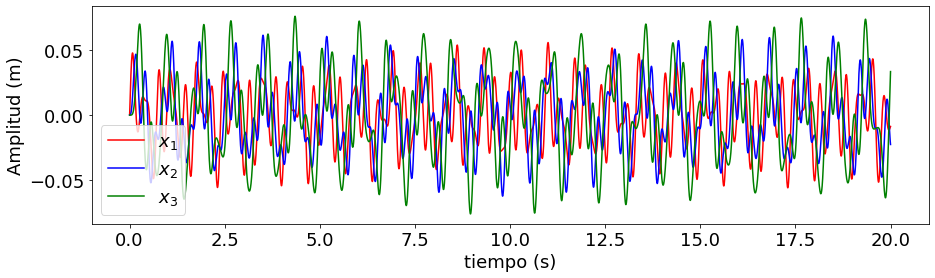

In [10]:
# Graficar resultado (0.2 pts)
 
# formato del lienzo
fig, ax = plt.subplots(figsize=(15,4)) # Tamaño del lienzo
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente

# graficamos la evolución de x1, x2 y x3
plt.plot(t,x1,'r',label = '$x_1$')
plt.plot(t,x2,'b',label = '$x_2$')
plt.plot(t,x3,'g',label = '$x_3$')

# formateamos los ejes
plt.ylabel('Amplitud (m)')
plt.xlabel('tiempo (s)')
plt.legend()
plt.show()

## Ecuaciones Diferenciales Ordinarias con Condiciones de Borde

### Tarea 5, problema 1

<img src="./images/hw5_problem1.png" width="350px" align= center>

La ecuación diferencial para determinar la deflección $y$ (en $\mathrm{m}$) a largo del eje $x$ (en $\mathrm{m}$) de una viga de largo $L$, simplemente apoyada y con una carga distribuida uniforme $w$ es:

\begin{equation*}
EI\frac{d^2 y}{d x^2} - \frac{wLx}{2} + \frac{wx^2}{2} = 0
\end{equation*}

donde $E$ es el módulo de elasticidad, y $I$ es el momento de inercia. Las condiciones de borde son $y(0) = y(L) = 0$.

Se desea determinar la distribución de $y(x)$ para $E = 200~\mathrm{GPa}$, $I = 30.000~\mathrm{cm}^2$, $w = 15~\mathrm{kN/m}$, y $L=3~\mathrm{m}$.

**(a) pts** Resuelva el problema utilizando el método del disparo, implementado a través del método de [Runge-Kutta de cuarto orden (RK4)](https://panxopanza.github.io/metodos_numericos_mec301/9-EDO_valor_inicial/9-EDO_valor_inicial.html#runge-kutta-de-cuarto-orden-rk4). En un gráfico, compare su solución con la solución exácta:

\begin{equation*}
y = \frac{wLx^3}{12EI} - \frac{wx^4}{24EI} - \frac{wL^3x}{24EI}
\end{equation*}

> **NOTA** Aplique RK4 considerando un total de 10 nodos en la barra. 

In [11]:
# Definimos los parámetros (0.1 pts)
E = 200E9    # Módulo de elasticidad (Pa)
I = 30000E-4 # Momento de inercia (m^2)
w = 15E3     # Carga distribuida (N/m)
L = 3        # Largo de la barra (m)
nt = 10      # número de nodos en la barra

# condiciones de borde
y0, yL = 0, 0

In [12]:
# Declaramos F con y[0] = y, y[1] = dydx (0.5 pts)
F = lambda t,y: np.array(
                [y[1], 
                 w*L*t/(2*E*I) - w*t**2/(2*E*I)])

In [13]:
# Creamos una función RK4 (0.8 pts)
def RK4(F,t_span, nt, f0):
    h = (t_span[1] - t_span[0])/(nt - 1)
    t = np.linspace(t_span[0],t_span[1],nt)
    
    f = np.zeros((len(f0),len(t)))
    f[:,0] = np.array(f0, dtype=object)
    for i in range(len(t) - 1):
        k1 = F(t[i]        , f[:,i]           )
        k2 = F(t[i] + 1/2*h, f[:,i] + 1/2*k1*h)
        k3 = F(t[i] + 1/2*h, f[:,i] + 1/2*k2*h)
        k4 = F(t[i] +     h, f[:,i] +     k3*h)
        
        f[:,i+1] = f[:,i] + 1/6*(k1 + 2*k2 + 2*k3 + k4)*h
        
    return t, f

In [14]:
# buscamos la pendiente en el extremo izquierdo (0.3 pts)

from scipy.optimize import fsolve

def find_dy0(dy0):
    t, y = RK4(F, [0, L], nt, [y0, dy0])
    
    return y[0,-1] - yL

dy_sol = fsolve(find_dy0, x0 = -3E-8) # usamos solución exacta para ajustar un valor inicial
t, y = RK4(F, [0, L], nt, [y0, dy_sol])

In [15]:
%%capture showplot

# Graficamos ambas soluciones (0.3 pts)
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 5))           # Tamaño del lienzo
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente

# solución exacta
x = np.linspace(0,L,100)                                            # puntos a gráficar
y_exact = w*L*x**3/(12*E*I) - w*x**4/(24*E*I) - w*L**3*x/(24*E*I)   # solución exacta

plt.plot(x,y_exact*1E9,':k', label='exact') # gráfico de solución exacta
plt.plot(t,y[0,:]*1E9,'o r', label='numerical') # gráfico de solución numérica
plt.xlim(0,L)
plt.xlabel('Largo de la barra, x (m)')
plt.ylabel('Deflección, y (nm)')
plt.legend()
plt.grid()
plt.show()

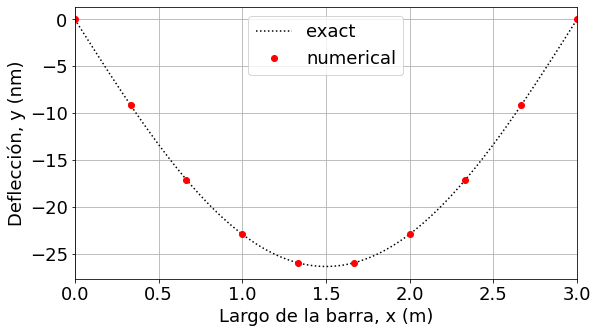

In [16]:
showplot()

## Diferencias finitas para EDP estacionaria

### Tarea 5, problema 2

Se desea resolver el problema de [difusión de calor 2D revisado en la unidad 11](https://panxopanza.github.io/metodos_numericos_mec301/11-DiferenciasFinitas_EDP/11-DiferenciasFinitas_EDP.html#ecuaciones-elipticas-edp-estacionaria) mediante `numpy.linalg.solve`. 

<img src="./images/plate_boundary_conditions.png" width="350px" align= center>

Para esto, considere los siguientes pasos:

In [17]:
import numpy as np
from itertools import product 

# definimos las constantes del problema
Ta   = 500  # Temperatura al lado izquierdo (K)
Tb   = 500  # Temperatura al lado derecho (K)
Too  = 300  # Temperatura del aire (K)
h    = 100  # Coeficiente convectivo (m^-1)
q0   = 1000 # flujo de calor (K/m)
L, H = 1, 1.5 # Largo y ancho de la cavidad (m)

**(a)** Implemente una función `T_plate_Ab(Nx,Ny)` que determine las matrices $A$ y $b$ del sistema de ecuaciones $Ax = b$. Las condiciones de borde deben estar incluidas como coeficientes dentro la matriz $A$, similar a la matriz para mallado 3x3 discutida en la [unidad 11](https://panxopanza.github.io/metodos_numericos_mec301/_images/discretized_plate_4x4.png). 

Compruebe su función para `A, b = T_plate_Ab(3,3)` 

<img src="./images/problema2_comprobacion.png" width="600px" align= center>

In [18]:
def T_plate_Ab(Nx,Ny):
    
    # Definimos las características de la malla
    nx, ny = Nx - 1, Ny - 1         # índice último nodo
    dx, dy = L/(Nx - 1), H/(Ny - 1) # espaciamiento entre nodos
    
    A = np.zeros((Nx*Ny,Nx*Ny))
    b = np.zeros(Nx*Ny)
    
    for i, j in product(range(Nx),range(Ny)):  # loop sobre i y j
        
        # condiciones de borde
        if   i == 0:  
            A[i*Ny + j,i*Ny + j] = 1
            b[i*Ny + j] = Ta
        
        elif i == nx:
            A[i*Ny + j,i *Ny+ j] = 1
            b[i*Ny + j] = Tb
        
        elif j == 0: 
            A[i*Ny + j,i*Ny + j  ] =  1
            A[i*Ny + j,i*Ny + j+1] = -1
            b[i*Ny + j] = dy*q0
            
        elif j == ny: 
            A[i*Ny + j,i*Ny + j  ] = (1 + dy*h)
            A[i*Ny + j,i*Ny + j-1] = -1
            b[i*Ny + j] = dy*h*Too
            
        # nodos centrales
        else: 
            A[i*Ny + j, i   *Ny + j  ] = -(2*dx**2 + 2*dy**2)
            A[i*Ny + j,(i+1)*Ny + j  ] = dy**2
            A[i*Ny + j,(i-1)*Ny + j  ] = dy**2
            A[i*Ny + j, i   *Ny + j+1] = dx**2
            A[i*Ny + j, i   *Ny + j-1] = dx**2
           
    return A, b

In [19]:
A, b = T_plate_Ab(3,3)

In [20]:
print(A)

[[ 1.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      1.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      1.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      1.     -1.      0.      0.      0.      0.    ]
 [ 0.      0.5625  0.      0.25   -1.625   0.25    0.      0.5625  0.    ]
 [ 0.      0.      0.      0.     -1.     76.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      1.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      1.    ]]


In [21]:
print(b)

[  500.   500.   500.   750.     0. 22500.   500.   500.   500.]


**(b)** Implemente una función `T_plate_solve(Nx,Ny)` que, dado el número de nodos `Nx` y `Ny` para el eje x e y, determine la distribución de temperaturas en la placa. La función debe entregar el resultado en un arrreglo `T` de dimensiones `Nx, Ny`.

Como comprobación, considere:

<img src="./images/problema2_comprobacion_T.png" width="400px" align= center>

In [22]:
from numpy.linalg import solve

def T_plate_solve(Nx,Ny):
    A, b = T_plate_Ab(Nx,Ny)
    
    return solve(A, b).reshape(Nx,Ny)

In [23]:
print(T_plate_solve(3,3))

[[ 500.          500.          500.        ]
 [1350.71942446  600.71942446  303.95683453]
 [ 500.          500.          500.        ]]


**(c)** Para `Nx, Ny = 51, 76`, grafique la distribución de temperaturas en un mapa 2D. Incluya en su gráfico la distribución del flujo de calor $q = - \nabla T$.

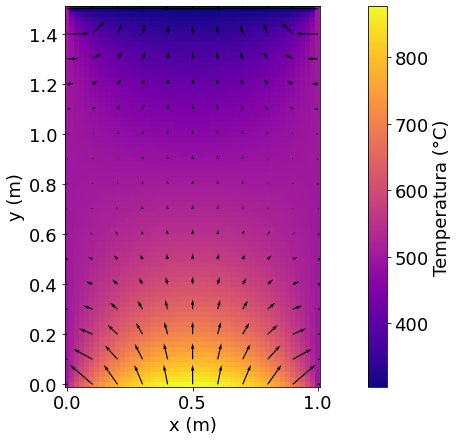

In [24]:
import matplotlib.pyplot as plt
from matplotlib import cm

Nx, Ny = 51, 76              # total de nodos
Tsol = T_plate_solve(Nx, Ny) # distribución de temperaturas

x =      np.linspace(0,L,Nx) # coordenadas x
y =      np.linspace(0,H,Ny) # coordenadas y
xx, yy = np.meshgrid(x,y)    # malla x-y

skip = (slice(None, None, 5), slice(None, None, 5))
qy, qx = np.gradient(Tsol.T,y,x) # gradiente 

plt.figure(figsize = (7, 7))
plt.rcParams.update({'font.size': 18})

plt.pcolor(xx, yy, Tsol.T, cmap=cm.get_cmap(cm.plasma))
plt.colorbar(label="Temperatura (°C)", orientation="vertical")
plt.quiver(xx[skip],yy[skip],- qx[skip],- qy[skip]) # campo vectorial de q

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('scaled')
plt.show()